In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set_style("darkgrid")

In [2]:
coffee = pd.read_csv("Coffee Shop Sales.csv")

In [67]:
coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total_Sales
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.000000,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.000000
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.099609,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.199219
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.500000,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.000000
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.000000,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.000000
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.099609,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.199219


In [ ]:
# Data Cleaning

In [69]:
coffee.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int32         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int8          
 4   store_id          149116 non-null  int8          
 5   store_location    149116 non-null  category      
 6   product_id        149116 non-null  int8          
 7   unit_price        149116 non-null  float16       
 8   product_category  149116 non-null  category      
 9   product_type      149116 non-null  category      
 10  product_detail    149116 non-null  object        
 11  Total_Sales       149116 non-null  float16       
dtypes: category(3), datetime64[ns](2), float16(2), int32(1), int8(3), object(1)
memory usage: 13.8 MB


In [9]:
coffee.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [5]:
coffee = coffee.astype({
    "transaction_id":"int32",
    "transaction_qty":"int8",
    "store_id":"int8",
    "store_location":"category",
    "product_id":"int8",
    "unit_price":"float16",
    "product_category":"category",
    "product_type":"category"
})

In [7]:
coffee["transaction_date"] = pd.to_datetime(coffee["transaction_date"],format="%d-%m-%Y")

In [9]:
coffee["transaction_time"] = pd.to_datetime(coffee["transaction_time"],format="%H:%M:%S")

In [ ]:
# Plot the sales trend over time and identify peak seasons.

In [11]:
coffee["Total_Sales"] = coffee["transaction_qty"] * coffee["unit_price"]

In [99]:
month_wise_sales = coffee.groupby(coffee["transaction_date"].dt.strftime("%B")).agg(total_sales = ("Total_Sales","sum")).reset_index()

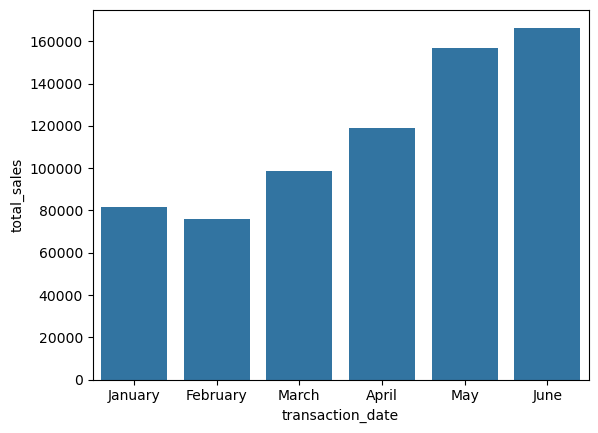

In [113]:
sns.barplot(
    x = "transaction_date",
    y = "total_sales",
    data = month_wise_sales,
    order= ["January","February","March","April","May","June"]
)
plt.show()

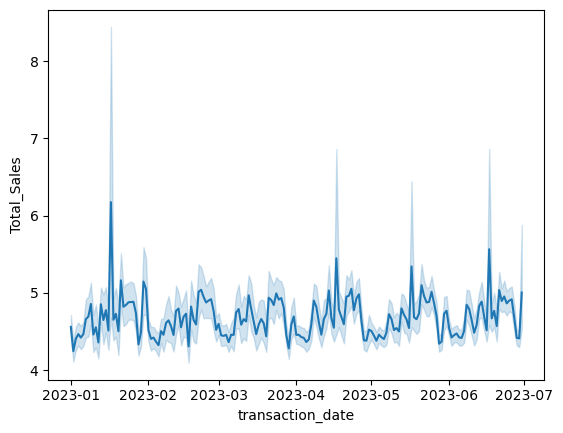

In [87]:
sns.lineplot(
    x = "transaction_date",
    y = "Total_Sales",
    data = coffee
)
plt.show()

In [ ]:
# Calculate and visualize the total revenue per store using a bar chart.

In [127]:
store_wise_revenue = coffee.groupby(
    "store_id").agg(
    Total_Revenue = ("Total_Sales","sum")).round(0).reset_index()

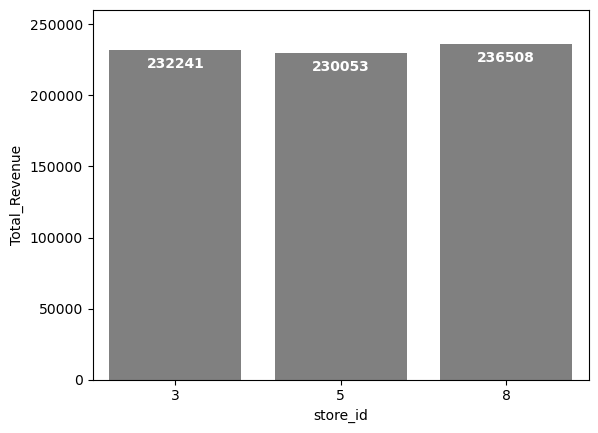

In [201]:
# s = []
# for store in store_wise_revenue["store_id"]:
#     s.append(store)
# r = []
# for revenue in store_wise_revenue["Total_Revenue"]:
#     r.append(revenue)

sr = sns.barplot(
    x = "store_id",
    y = "Total_Revenue",
    data = store_wise_revenue,
    color = "grey"
)
# for x,y in zip(s,r):
#     plt.text(x,y,str(y))
for p in sr.patches:
    sr.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()-15000), 
                ha='center', va='bottom', fontsize=10,color = "white",fontweight = "bold")
plt.ylim(0,store_wise_revenue["Total_Revenue"].max()*1.1)
plt.show()

In [ ]:
# Compare the revenue share of different product categories using a pie chart.

In [209]:
category_wise_revenue = coffee.groupby(
    "product_category",observed = False).agg(
    Total_Revenue = ("Total_Sales","sum")).reset_index()

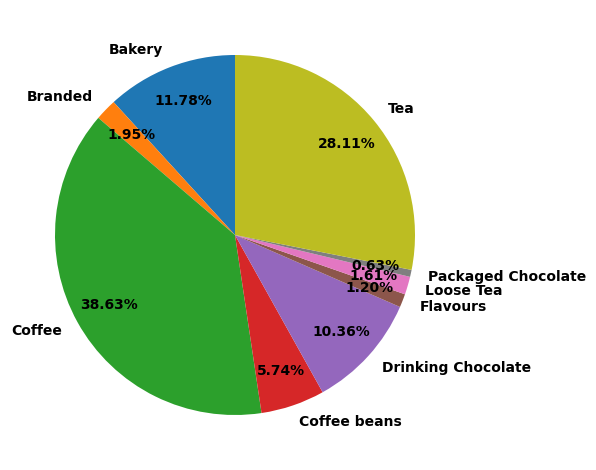

In [255]:
plt.pie(
    x = category_wise_revenue["Total_Revenue"],
    labels = category_wise_revenue["product_category"],
    autopct="%0.2f%%",
    startangle = 90,
    pctdistance= 0.8,
    textprops= {"color":"black","fontweight":"bold"}
    
)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze sales trends by day of the week and visualize with a heatmap.

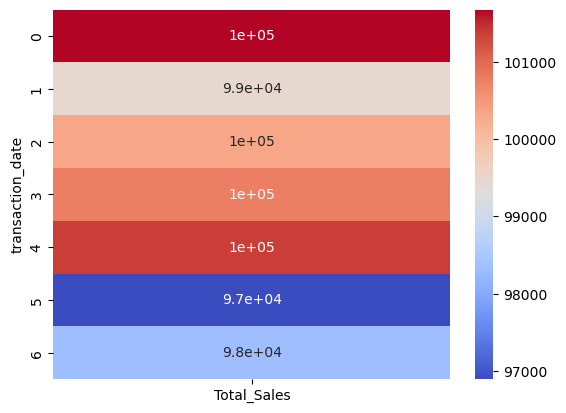

In [301]:
sns.heatmap(
    data = week_sales,
    cmap = "coolwarm",
    annot = True
)
plt.show()

In [ ]:
# Identify the busiest hour of the day using a histogram.

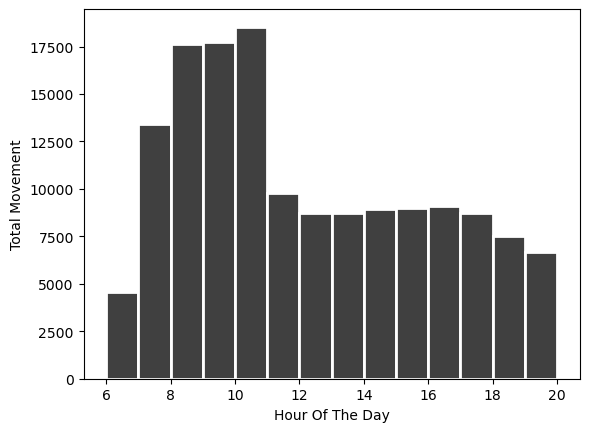

In [349]:
b =[]
for bin in range(6,21,1):
    b.append(bin)
sns.histplot(
    x = coffee["transaction_time"].dt.hour,
    data  = coffee,
    bins = b,
    color = "k",
    edgecolor = "white",
    linewidth = 2
)
plt.xlabel("Hour Of The Day")
plt.ylabel("Total Movement")
plt.show()

In [ ]:
# Find the store with the highest revenue variance over time.

In [448]:
grouped = coffee.groupby([coffee["transaction_date"].dt.strftime("%B"),"store_id"])[["Total_Sales"]].sum().reset_index()

In [452]:
grouped["transaction_date"] = pd.Categorical(
    grouped["transaction_date"],
    categories=pd.date_range("2023-01-01", "2023-12-31", freq="ME").strftime("%B"),
    ordered=True
)

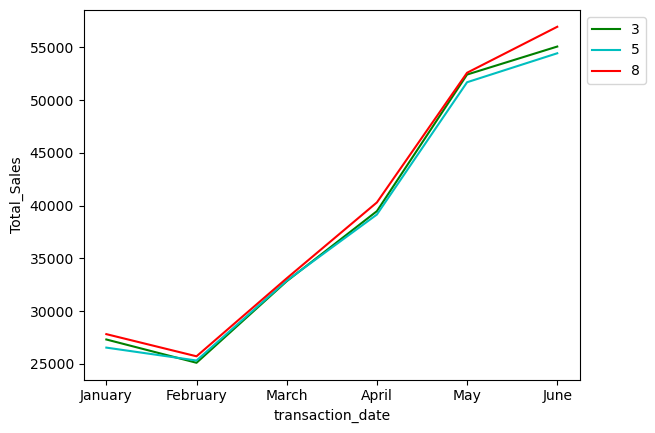

In [462]:
sns.lineplot(
    x = "transaction_date",
    y = "Total_Sales",
    data = grouped,
    hue = "store_id",
    palette = ["g","c","r"]
)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [460]:
grouped

,transaction_date,store_id,Total_Sales
8,January,8,27820.324219
6,January,3,27313.320312
7,January,5,26542.978516
3,February,3,25105.023438
4,February,5,25319.673828
5,February,8,25719.517578
14,March,8,33110.167969
13,March,5,32888.152344
12,March,3,32835.035156
0,April,3,39477.097656


In [458]:
grouped = grouped.sort_values(by="transaction_date", key=lambda x: x.cat.codes)

In [ ]:
# Create a moving average plot for sales trends to smooth fluctuations.

In [23]:
month_average = coffee.groupby(coffee["transaction_date"].dt.strftime("%Y-%m-01"),observed=False)[["Total_Sales"]].mean().reset_index().rename(
    columns = {"transaction_date":"Start_of_month","Total_Sales":"Average_Sales"})

In [39]:
month_average["Moving_Average"] = month_average["Average_Sales"].rolling(2).mean()

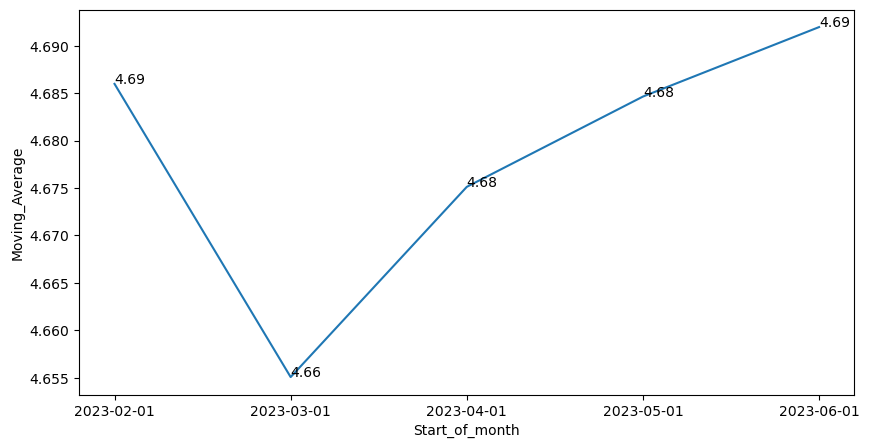

In [63]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    x = "Start_of_month",
    y = "Moving_Average",
    data = month_average
)
label = ax.lines[0]
x = label.get_xdata()
y = label.get_ydata()

for a,b in zip(x,y):
    ax.annotate(
        f"{b:.2f}",(a,b))
    
plt.show()

In [ ]:
# Calculate correlation between unit price and quantity sold (does price affect demand?).

In [69]:
coffee.loc[:,["transaction_qty","unit_price"]].corr()

,transaction_qty,unit_price
transaction_qty,1.000000,-0.123551
unit_price,-0.123551,1.000000


In [ ]:
# Use a scatter plot to visualize revenue vs. time to detect anomalies.

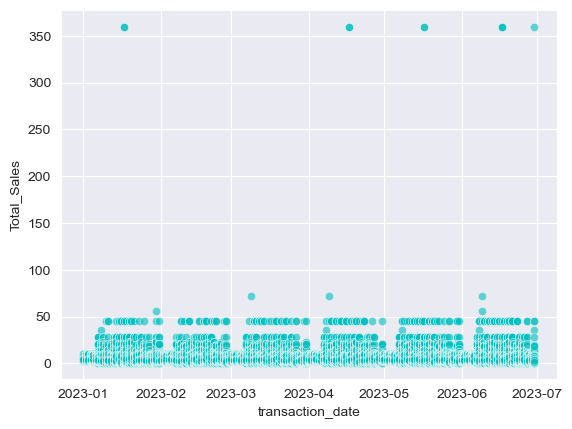

In [79]:
sns.scatterplot(
    x = "transaction_date",
    y = "Total_Sales",
    data = coffee,
    color = "c",
    alpha = 0.6
)
plt.show()

In [ ]:
# Identify outlier transactions using box plots for transaction values.

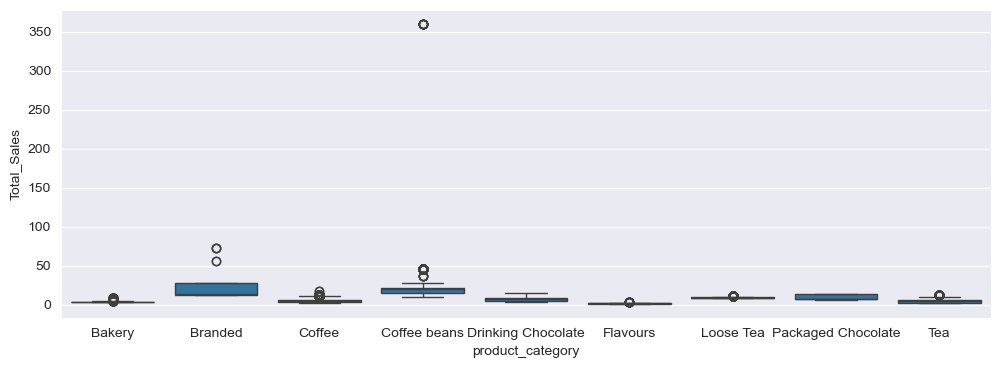

In [87]:
plt.figure(figsize=(12,4))
sns.boxplot(
    x = "product_category",
    y = "Total_Sales",
    data = coffee
)
plt.show()

In [91]:
coffee.loc[coffee["Total_Sales"]>300,:]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total_Sales
9310,9340,2023-01-17,1900-01-01 09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
9365,9395,2023-01-17,1900-01-01 09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
68806,68976,2023-04-17,1900-01-01 09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
68981,69151,2023-04-17,1900-01-01 11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
97979,98233,2023-05-17,1900-01-01 09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
98275,98529,2023-05-17,1900-01-01 11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
133186,133523,2023-06-17,1900-01-01 09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
133337,133674,2023-06-17,1900-01-01 10:41:11,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
133407,133744,2023-06-17,1900-01-01 11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0
148702,149043,2023-06-30,1900-01-01 11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0


In [ ]:
# Analyze the sales performance of different product types using a violin plot.

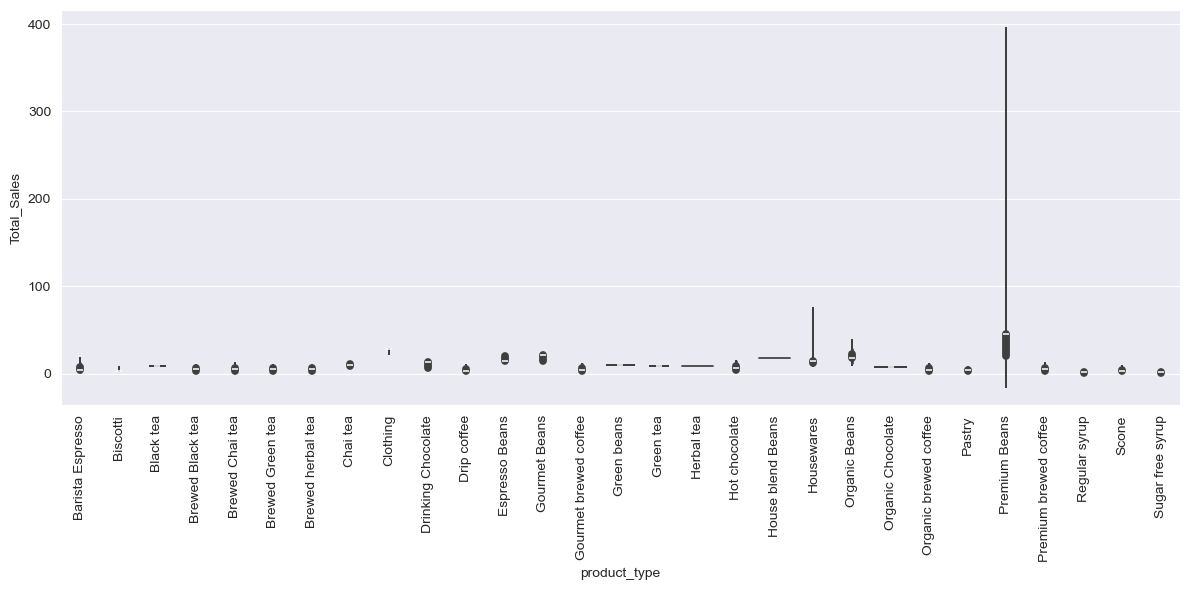

In [99]:
plt.figure(figsize = (12,6))
sns.violinplot(
    x = coffee["product_type"],
    y = coffee["Total_Sales"]
)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
# Perform a time-series decomposition of sales data to identify trends, seasonality, and residuals.

In [111]:
daily_sales = coffee.groupby(
    coffee["transaction_date"].dt.date,observed=False
)[["Total_Sales"]].sum()

In [139]:
decomposition = seasonal_decompose(daily_sales["Total_Sales"],model="additive",period=7)

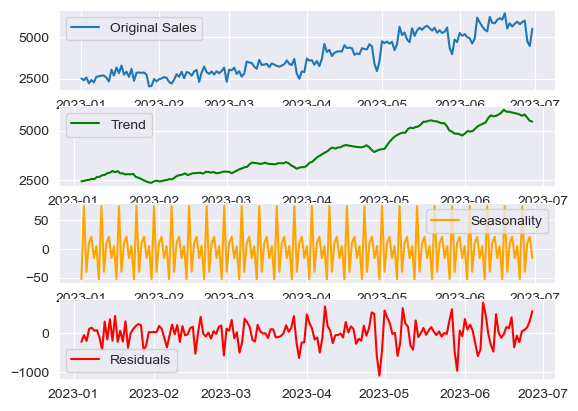

In [141]:
plt.subplot(4,1,1)
plt.plot(daily_sales['Total_Sales'], label='Original Sales')
plt.legend()

plt.subplot(4,1,2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend()

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend()

plt.subplot(4,1,4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend()

In [ ]:
# Analyze product category-wise revenue growth over time using a stacked area chart.

In [165]:
category_revenue = coffee.groupby("product_category",observed=False).agg(Total_Revenue = ("Total_Sales","sum")).reset_index()

In [225]:
category_revenue["Growth"] = ((category_revenue["Total_Revenue"] - category_revenue["Total_Revenue"].shift())/category_revenue["Total_Revenue"].shift())*100

In [197]:
category_revenue["Growth"].fillna(0,inplace=True)

C:\Users\soumy\AppData\Local\Temp\ipykernel_14040\1384559872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  category_revenue["Growth"].fillna(0,inplace=True)


In [211]:
category_revenue = category_revenue.astype({
    "Total_Revenue":"float32",
    "Growth":"float32"
})

In [229]:
category_revenue

,product_category,Total_Revenue,Growth
0,Bakery,82315.750000,NaN
1,Branded,13607.000000,-83.469749
2,Coffee,269940.343750,1883.834473
3,Coffee beans,40085.718750,-85.150162
4,Drinking Chocolate,72416.000000,80.652870
5,Flavours,8406.639648,-88.391182
6,Loose Tea,11216.360352,33.422638
7,Packaged Chocolate,4407.520020,-60.704540
8,Tea,196407.375000,4356.187988


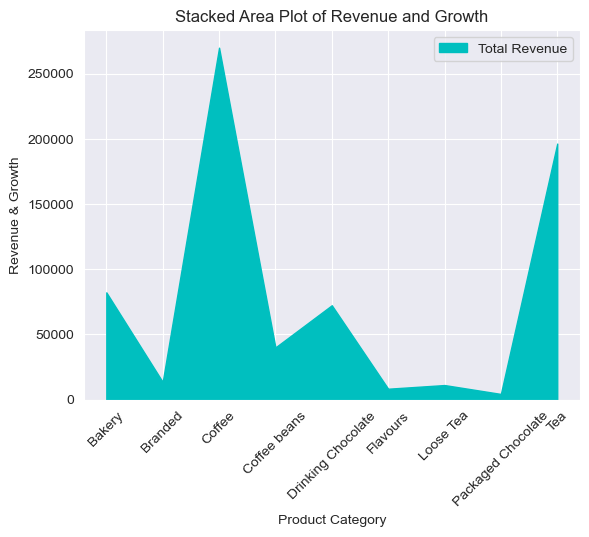

In [315]:
x = range(len(category_revenue["product_category"]))
y1 = category_revenue["Total_Revenue"]
plt.stackplot(x,y1,labels=["Total Revenue", "Growth"],color="c")
plt.xticks(x, category_revenue["product_category"], rotation=45)  # Label x-axis with categories
plt.xlabel("Product Category")
plt.ylabel("Revenue & Growth")
plt.legend()
plt.title("Stacked Area Plot of Revenue and Growth")
plt.show()

In [437]:
category_wise_revenue_over_time = coffee.groupby(
    [coffee["transaction_date"]-pd.to_timedelta(coffee["transaction_date"].dt.dayofweek,unit="D"),
"product_category"],observed=False)[["Total_Sales"]].sum().reset_index().rename(
    columns={"transaction_date":"Start_of_week","Total_Sales":"Total_Revenue"})

In [15]:
x1 = range(category_wise_revenue_over_time["Start_of_week"].nunique())
y_bakery = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Bakery","Total_Revenue"]
y_branded = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Branded","Total_Revenue"]
y_coffee = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Coffee","Total_Revenue"]
y_beans= category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Coffee beans","Total_Revenue"]
y_drinking = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Drinking Chocolate","Total_Revenue"]
y_packaged = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Packaged Chocolate","Total_Revenue"]
y_flavours = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Flavours","Total_Revenue"]
y_loose = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Loose Tea","Total_Revenue"]
y_tea = category_wise_revenue_over_time.loc[category_wise_revenue_over_time["product_category"] == "Tea","Total_Revenue"]

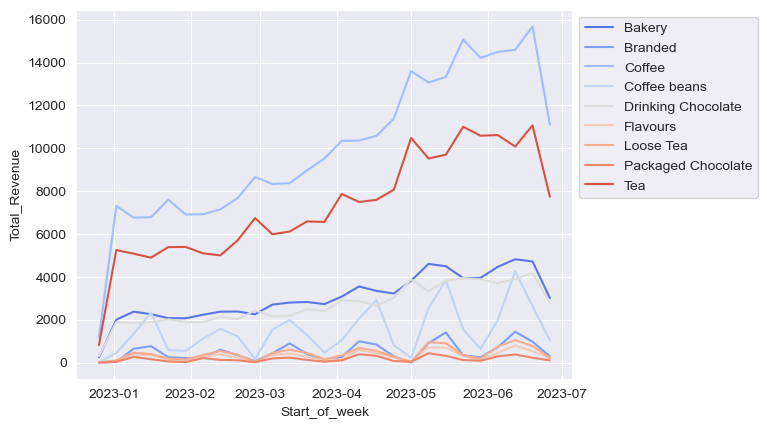

In [369]:
sns.lineplot(
    x = "Start_of_week",
    y = "Total_Revenue",
    data = category_wise_revenue_over_time,
    hue = category_wise_revenue_over_time["product_category"],
    palette="coolwarm"
)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

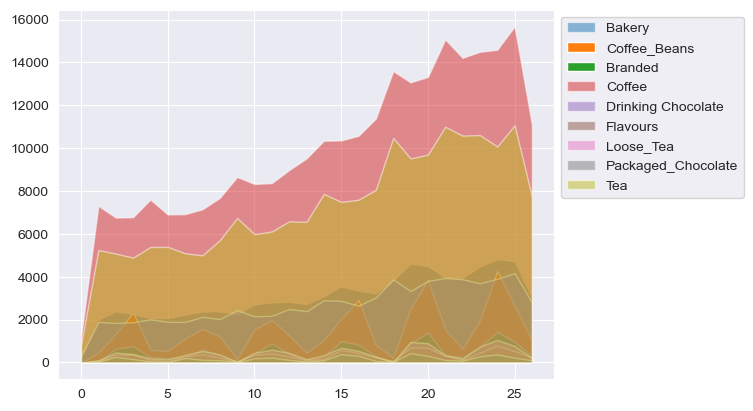

In [419]:
plt.fill_between(x1,y_bakery,alpha=0.5,label="Bakery")
plt.fill_between(x1,y_beans,label="Coffee_Beans")
plt.fill_between(x1,y_branded,label="Branded")
plt.fill_between(x1,y_coffee,alpha=0.5,label="Coffee")
plt.fill_between(x1,y_drinking,alpha=0.5,label="Drinking Chocolate")
plt.fill_between(x1,y_flavours,alpha=0.5,label="Flavours")
plt.fill_between(x1,y_loose,alpha=0.5,label="Loose_Tea")
plt.fill_between(x1,y_packaged,alpha=0.5,label="Packaged_Chocolate")
plt.fill_between(x1,y_tea,alpha=0.5,label="Tea")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [125]:
cwr_p = category_wise_revenue_over_time.pivot(
    index = "Start_of_week",
    columns = "product_category",
    values = "Total_Revenue"
).fillna(0)

In [85]:
cwr_p_sorted = cwr_p[cwr_p.sum().sort_values(ascending=True).index]

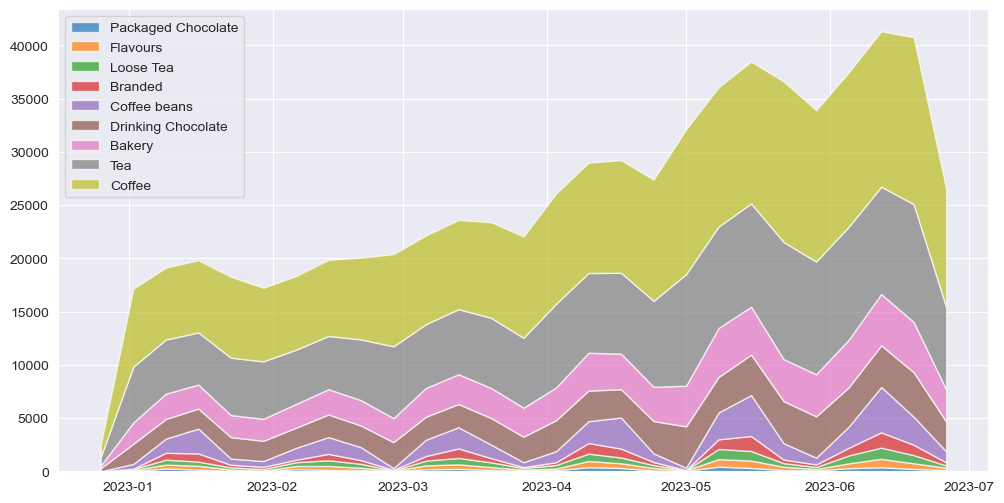

In [439]:
plt.figure(figsize=(12,6))
plt.stackplot(cwr_p_sorted.index, cwr_p_sorted.T.values, labels=cwr_p_sorted.columns, alpha=0.7)
plt.legend()
plt.show()

In [97]:
stacked_df = category_wise_revenue_over_time.pivot(
    index="Start_of_week", columns="product_category", values="Total_Revenue"
)

In [99]:
print(category_wise_revenue_over_time["Total_Revenue"].sum())  # Line chart total
print(stacked_df.sum().sum())  # Stacked chart total

698802.75
698802.7


<Axes: xlabel='Start_of_week'>

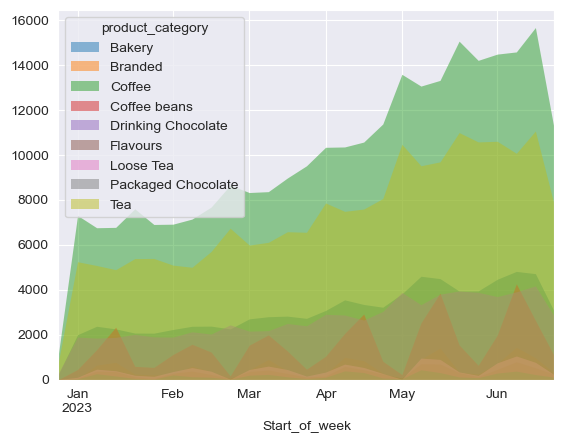

In [135]:
stacked_df.plot.area(stacked=False,alpha=0.5,linewidth = 0)

In [ ]:
# Determine the average price of each product category and plot as a bar chart.

In [159]:
avg_price_category = coffee.groupby("product_category",observed=False).agg(Average_Price=("unit_price","mean")).reset_index().sort_values(
    "Average_Price",ascending=False)

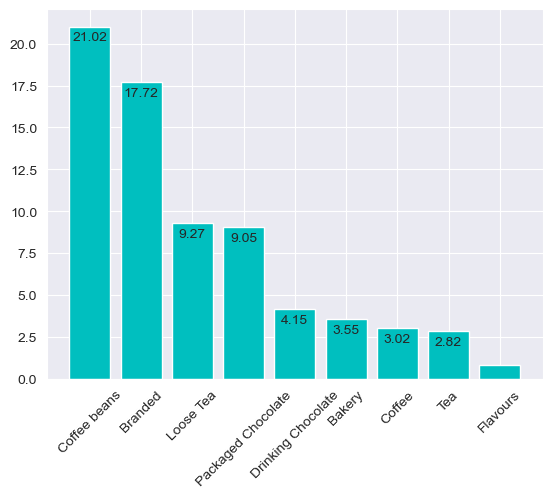

In [205]:
ax = plt.bar(
    avg_price_category["product_category"],
    avg_price_category["Average_Price"],
    color = "c"
)
plt.xticks(rotation=45)
for p in ax.patches:
    plt.annotate(
        f"{p.get_height():.2f}",
        (p.get_x()+p.get_width()/2,p.get_height()-1), ha="center", va ="bottom"
    )
plt.show()

In [ ]:
# Visualize the top-selling products in a horizontal bar chart.

In [213]:
top_selling_products = coffee.groupby(
    "product_type", observed = False
).agg(Total_sales = ("Total_Sales","sum")).reset_index().sort_values("Total_sales",ascending = True)

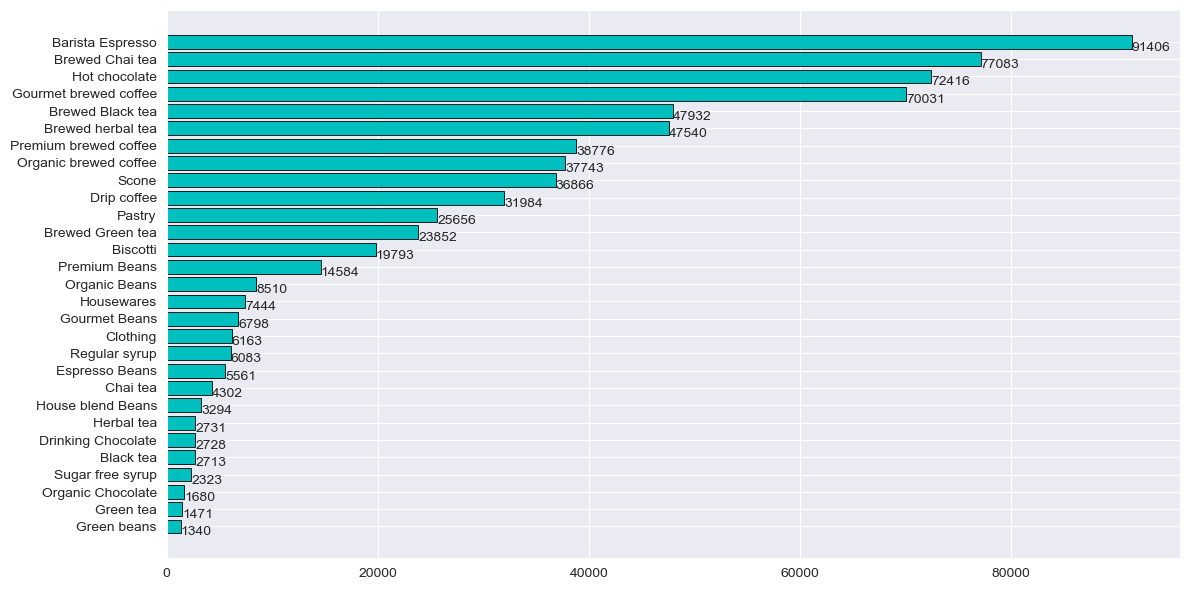

In [277]:
n = []
for name in top_selling_products["product_type"]:
    n.append(name)
v =[]
for value in top_selling_products["Total_sales"]:
    v.append(value)

plt.figure(figsize=(12,6))
hx = plt.barh(
    top_selling_products["product_type"],
    top_selling_products["Total_sales"],
    color = "c",
    edgecolor = "k",
    linewidth = 0.6
)
for x,y in zip(n,v):
    plt.text(y,x,f"{y:.0f}",ha="left",va="top")
plt.tight_layout()
plt.show()

In [ ]:
# Analyze customer purchase patterns by grouping transactions by time and store.

In [325]:
coffee.groupby([coffee["transaction_time"].dt.hour,"store_location"],observed=False).agg(
    total_transactions = ("transaction_id","count"),
    total_revenue = ("Total_Sales","sum")
).reset_index()

,transaction_time,store_location,total_transactions,total_revenue
0,6,Astoria,0,0.000000
1,6,Hell's Kitchen,1676,7531.079102
2,6,Lower Manhattan,2918,14368.923828
3,7,Astoria,4181,19028.541016
4,7,Hell's Kitchen,3455,15960.954102
5,7,Lower Manhattan,5792,28536.142578
6,8,Astoria,4966,22805.574219
7,8,Hell's Kitchen,6909,31544.082031
8,8,Lower Manhattan,5779,28349.121094
9,9,Astoria,5083,23183.265625


In [ ]:
# Compare weekday vs. weekend sales using bar plots for different product categories.

In [329]:
coffee["week_trend"] = np.where(coffee["transaction_date"].dt.dayofweek .isin ([5,6]), "Weekend", "Weekday")

In [351]:
week_with_category = coffee.groupby(["week_trend","product_category"],observed=False)[["Total_Sales"]].sum().reset_index()

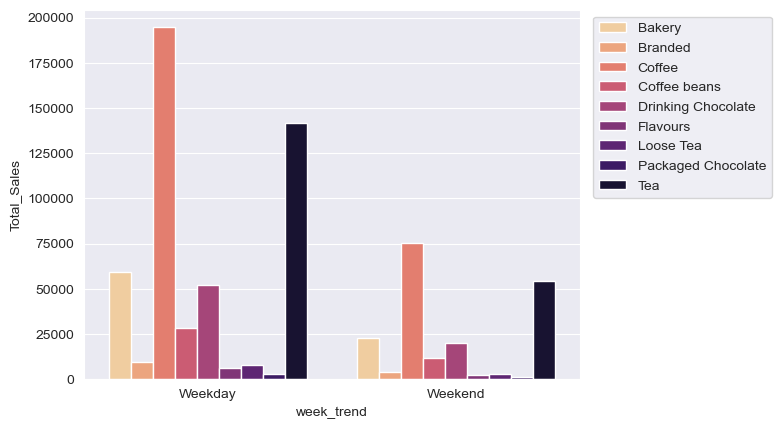

In [373]:
sns.barplot(
    x = "week_trend",
    y = "Total_Sales",
    data = week_with_category,
    hue = week_with_category["product_category"],
    palette= "magma_r"
)
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

In [ ]:
# Analyze the average transaction value per store and compare using a box plot.

In [395]:
coffee.groupby("store_id",observed=False)[["Total_Sales"]].mean()

,Total_Sales
store_id,
3,4.589832
5,4.814644
8,4.661643


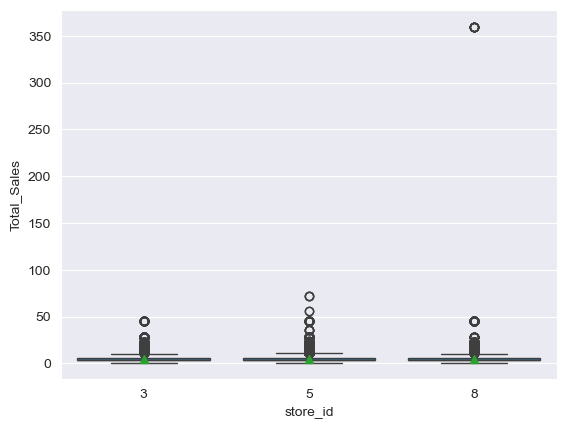

In [403]:
sns.boxplot(
    x = "store_id",
    y = "Total_Sales",
    data = coffee,
    showmeans = True
)
plt.show()

In [441]:
cwr_p_sorted

product_category,Packaged Chocolate,Flavours,Loose Tea,Branded,Coffee beans,Drinking Chocolate,Bakery,Tea,Coffee
Start_of_week,,,,,,,,,
2022-12-26,0.000000,0.000000,0.000000,0.0,0.000000,295.50,241.500000,811.109375,1160.050781
2023-01-02,33.726562,75.978516,102.171875,28.0,450.109375,1891.00,2000.000000,5248.007812,7310.064453
2023-01-09,260.242188,367.103516,462.968750,645.0,1330.781250,1845.75,2374.031250,5080.792969,6762.638672
2023-01-16,159.304688,358.312500,392.937500,765.0,2334.718750,1878.50,2256.355469,4894.126953,6779.003906
2023-01-23,47.726562,123.169922,191.703125,246.0,587.359375,2011.75,2071.318359,5388.736328,7603.570312
2023-01-30,20.929688,49.586914,144.390625,206.0,542.359375,1899.50,2066.558594,5394.193359,6907.820312
2023-02-06,208.375000,285.519531,355.000000,230.0,1116.421875,1890.25,2230.207031,5096.794922,6920.531250
2023-02-13,124.515625,376.708008,534.296875,599.0,1572.375000,2127.25,2373.000000,5001.441406,7147.859375
2023-02-20,105.320312,225.544922,370.687500,342.0,1225.265625,2028.00,2380.271484,5705.089844,7680.656250
